### Import Modules

In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import load_model
from keras.utils import model_to_dot
from keras import backend as K
from IPython.display import SVG
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

Using TensorFlow backend.


### Data Preparation

In [2]:
# target image size 
img_width, img_height = 255, 255

if K.image_data_format() == 'channels_first':
    shape = (3, img_width, img_height)
else:
    shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [4]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)
predict_datagen = ImageDataGenerator()

In [5]:
train_data_dir = './dataset/train_set'
validation_data_dir = './dataset/validation_set'
predict_data_dir = './dataset/predict_set'
epochs = 15
batch_size = 64

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

prediction_generator = predict_datagen.flow_from_directory(
    predict_data_dir,
    target_size=(img_width, img_height),
    shuffle=False,
    class_mode='binary')

Found 6266 images belonging to 2 classes.
Found 1302 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


### Training Model

In [6]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=6266 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=1302 // batch_size
)
history

Epoch 1/15
97/97 [==============================] - 68s 704ms/step - loss: 0.7220 - accuracy: 0.6787 - val_loss: 0.2435 - val_accuracy: 0.9016
Epoch 2/15
97/97 [==============================] - 42s 429ms/step - loss: 0.3782 - accuracy: 0.8636 - val_loss: 0.1463 - val_accuracy: 0.9354
Epoch 3/15
97/97 [==============================] - 41s 423ms/step - loss: 0.3101 - accuracy: 0.8875 - val_loss: 0.2236 - val_accuracy: 0.9297
Epoch 4/15
97/97 [==============================] - 40s 413ms/step - loss: 0.2756 - accuracy: 0.9036 - val_loss: 0.2038 - val_accuracy: 0.9418
Epoch 5/15
97/97 [==============================] - 41s 421ms/step - loss: 0.2526 - accuracy: 0.9145 - val_loss: 0.2501 - val_accuracy: 0.9346
Epoch 6/15
97/97 [==============================] - 37s 382ms/step - loss: 0.2412 - accuracy: 0.9179 - val_loss: 0.2501 - val_accuracy: 0.9338
Epoch 7/15
97/97 [==============================] - 39s 404ms/step - loss: 0.2149 - accuracy: 0.9253 - val_loss: 0.6370 - val_accuracy: 0.8530

In [7]:
test_data_dir = './dataset/test_set'
test_it = test_datagen.flow_from_directory(
    test_data_dir, 
    target_size=(img_width, img_height), 
    class_mode='binary', 
    batch_size=batch_size
)
result = model.evaluate_generator(test_it, steps=32)
print('loss:', result[0], 'accuracy:', result[1])

Found 1299 images belonging to 2 classes.
loss: 0.12477310001850128 accuracy: 0.9331003427505493


### Model Prediction

In [10]:
classification_index = train_generator.class_indices
print(classification_index)

predict_outcome = model.predict(prediction_generator)
df = pd.DataFrame(data=predict_outcome, index=['nsfw', 'nsfw', 'nsfw', 'nsfw', 'nsfw', 'nsfw', 'nsfw', 'nsfw', 'nsfw', 'nsfw', 'sfw', 'sfw', 'sfw', 'sfw', 'sfw', 'sfw' ], columns=['Predicted Label'])
df

{'nsfw': 0, 'sfw': 1}


,Predicted Label
nsfw,0.0
nsfw,0.0
nsfw,1.0
nsfw,0.0
nsfw,0.0
nsfw,0.0
nsfw,0.0
nsfw,1.0
nsfw,0.0
nsfw,1.0


### Model Prediction - Single Item

In [19]:
img = load_img(predict_data_dir + '/sfw/4.jpg', target_size=(img_width, img_height))
data = img_to_array(img)
data = data.reshape((1,) + data.shape)
pred = model.predict(data)
df = pd.DataFrame(data=predict, columns=['Predicted Label'])
df

NameError: name 'predict' is not defined

### Saving Model

In [13]:
model.save("./model/model_6_64batch_15epochs.h5")

### Loading Model

In [6]:
model_name = 'model_6_64batch_15epochs' + '.h5'

loaded_model = load_model("./model/" + model_name)

test_data_dir = './dataset/test_set'
test_it = test_datagen.flow_from_directory(
    test_data_dir, 
    target_size=(img_width, img_height), 
    class_mode='binary', 
    batch_size=batch_size
)
loaded_result = loaded_model.evaluate_generator(test_it, steps=32)
print('loss:', loaded_result[0], 'accuracy:', loaded_result[1])

Found 1299 images belonging to 2 classes.
loss: 0.24897213280200958 accuracy: 0.9355965852737427


In [7]:
classification_index = train_generator.class_indices
print(classification_index)

predict_outcome = loaded_model.predict_generator(prediction_generator)
print(predict_outcome)
df = pd.DataFrame(data=predict_outcome, index=['nsfw', 'nsfw', 'nsfw', 'nsfw', 'nsfw', 'nsfw', 'nsfw', 'nsfw', 'nsfw', 'nsfw', 'sfw', 'sfw', 'sfw', 'sfw', 'sfw', 'sfw' ], columns=['Predicted Label'])
df

{'nsfw': 0, 'sfw': 1}
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


,Predicted Label
nsfw,0.0
nsfw,0.0
nsfw,1.0
nsfw,0.0
nsfw,0.0
nsfw,0.0
nsfw,0.0
nsfw,1.0
nsfw,0.0
nsfw,1.0


### Single Image Prediction

In [11]:
import urllib.request as request

url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxAPEA8PEA8PDw8PDw8PDw8NDw8NDw8PFREWFhUVFRUYHSggGBolGxUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQFS0dHSYrKysrLS0vNysrLS0rKy0rKystOCstLSstKysrLSstLS0tLSstLS0rLS0tKystLSstLf/AABEIAQkAvgMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAABAgMEBQAGB//EAD0QAAIBAgMFBgQDBgUFAAAAAAABAgMRBBIhBRMxQVEGImFxgaEykbHBQlLhFCNygtHwFWKSssIWM0OD8f/EABkBAQEBAQEBAAAAAAAAAAAAAAABBAMCBf/EACMRAQADAAEEAgIDAAAAAAAAAAABAhEDEiExMgQiQaETUWH/2gAMAwEAAhEDEQA/APmJxyGPCuCgIIUQoAyAKGQEMADgnACx1ghACQTkEihY6wQ2CEOsNYBQljhrAsVCgYwAFANYDQEaCEJFAIbBSAAyOsMkByCckFIDjhrFepioqWRXlN/hX36EVMEuYHY1arHM3JJq6yQ+75eJmYuFbDyaqxcoX42s/wBTzFomcep47RG4nCdTakk1qmrp9UNY9PJQhsGwCAHsdYIjAPYFihAMdoDRUIBj2BYCOwyRyQyRFBIZIKQUgBYNgpBSIoJDWOSDYAWLewdmRq4mMHopuM5PjmSTuiCnG7S6tL3HxeKeFrwqw/Co2X5orRr1+xzvP4deKPzL6ntZxoYZ5IJuKSiuSu7XfguJ5ihgp4mnXnWpONO9qWe2apG2srcuRP2fr1MVVWIhNvDOEnJynmc5tWVNRvaKj5X8Sz/iNSKqRqRajKdqNN/HGGa0pS6Ru0l15Gfw2RGvDYqMKccr7ss8YQXWNmrey9yKxpdpMOr6RvKElNLmZ1NppNcHqaeOdhj5oywWOsPY6x0cSWBYex1gI2gND2BYCNoVolaFaKiNoFiSwtgESDYIUiK5IKRwUiK6wUgpBsAEg2DYKQQ1Jd5eaD2joxlwllcIJu/eavwTfWy+bOho0y12hwlNU6OrzzcpT8YuPP2OXJ5h34vEwrdl8ZUwd3Btxm7yjfRu1rrxPUf4zQlJVZJuas0pN2zpd1tc7Hm9n7LryinCE5X00j3X68Lnp9k9mWu9WV5fkTVorx6s8X6c38unHa8TkeGFtHE55OTd3J3Zm0U7tRV10XI9viuzkJJpd3hy046kNHYEKNnHvSvz0SPNb4634+p5Vwa4przTQLH0+lg6eVeXrc8T2moRhV7vXXxOleXZyYcLcGRsSxbHWHsCx2Z0dgWJGgNBETQGiRoVoojsCw7QGioiSCcgnl6cMkckEAhOOCCFI5IZASYaKc45vhur8rroekwVKOLxUIuC3NKOaUUr5uSi30vr8zzKPbdnGlCUoqzcIqd/izJX18PA4c39tPB5xtVqEVe0Ulx5aEcY+LuHA0alSDck1x489TPx1Z03xM8tkNZ03ZNtmfjJJGhhW6sadvyop7bwqhTlO6ur6eg8prGwW13Os6UdVaUvRf8A0ye0jvO/O6Idm4mNPFQq8I1adSlZ8pNxkv8Aaw7bvmv1ase4jJhJ7xKjYFh7AsbXzCNCtEjQrQEbQrRK0K0BG0LYkaFaCIBkBBRHoUFHBCOGQAoAodICGRFPRm4tSjo1wfR9Uew7KQy4epUfOpJ687WX9Tx6R7PDvc4CK5yg5P11+5y5fDR8eNs1a/aKlTp6SjZ9Ob6GVDDuSlia6av/ANmk9H/FJdei+fhW7L4KG5p13CLnLM87Sbs5NrXyNHa+IukvRIzzLXEYn/bf2ZU3buuCzW4p8bmftLaaqp5WpJ9CxtWayWfHKjx2KWrlfXwLBMKm1qy3kIxfeg1N25cUvuT4iq52vxuitsnZ0q9aUvzcF/li7fW5ar08tTL+W50z7RDlM5WZCwLD2BY0sBLAaHaFaKEaFaJGhWgI2hWiRiNAVkMhUMiKIQIZBBQyFQ6Cih0hUOiCfB4d1akKa4zko+XV/I9ZtyjKVN0aS/LTh0vaxndj6F6s6j/8cNPOX6J/M9VgaKd5vq7f1M/LPfGz49crqHB4Lc0adKP4IRivGytcrV8MlJN6ta2NiTS4mXK7qVKjlFQSSil8Unre76cDi7xLF2tUb4vgebxU7tpcZOyPQ1f3k5dDDxtPJVi+TvH1f9+57p5wvOVmYbvZXDKEatd8KcN3Hz4v7fMwZzz1Kk+rPUT/AHOBhHnUWd/za/Sx5ektL9Xc6173mWa/14og1gDAO7KVisdigIxWO0BoqI2KyRiMCmMhUMiKZBQEMggodCoZEUyJEJFDoI9T2a7mHq1PzTsvRI9K5ZYRS5pW8rHmsypwwuG5ycZT833ma9WGVcX4eRktO2fSrXKxCXEVdOJlYio9UWZtyWhRrwkuR5eolWhO10lqzE2xJ56cUtXVpRXm5pfc9BhaN2378kU8LT32Npuy3eFjKtLpKa0hfxu7/wApY8k9+y52nq5VGkvwxjH5KxgpF3asnKd3xevzKdjRxR21k+Rb7YABgHVnKxRmBoBWKx2hWioRiMkYjQFBDoRDIinQyFQyCGQyFQyIqSJYwVLPUpw/NOKflfUrRNTYbjGVStLhQpSqJc27WJach6pXbRD0FTAN46E5WcVTc425Sso/Rv5l3aj4+BS2ftB16qnbu/s1Gcf/AGXb/wBqG2jV1Zkny+liLD4+KTUtGUsZjc3CXPlxMPbdSSTytrnoSbLwjnWppybUpaq1r9T1FdjXi1orOS9RgqbnTWVZYdX+JkqwcKFGcvx1dZPm7cF5I0aslGKjHRRXI8/tHGStKOjSVOMfOV3L2R5e47MatK8mIJGpm19fnqMa6eIfO5feXACBnt4BisZikAYrGYrKhWKxmIwKCGQqGRFMhkKhkVDIdCIZEVJEubPmlJxl8NSE6Tvw7ysvexTiOiTGrWcnW/2SlLdPOrSp2w7tz3V1f1uiTaNXUXYk/wB03zc5N+L0INoS4sx29pfUrO1iYZO0ZZnbq7FvZ9bJUhLpL66fcz4PNNvovdlg0Ur9WLmv94/x7WnVueW2lOcJyjJPVzndJ5btZVZ+Rs7Kr5oK/FaP0INrO6dzP4nGyO8a87h3rL0+n6E5DS+KXp9yU109Xz+X3kQM4B7cwYAsUgDFYzFZUKxQsDCKCGQqGRHoyGQqGRUMMhUOiKaJIiNDoo3tgtOEk+Um/ZFHbWJjFPVdOJUjsSVWEqixNSindZYrMnZfxIwXsmTb/ftpN6uPH3OP8dJts3/TZXk5IpERT9rmG2hSinnmlJy1Vm3blwRcp4+lLhUj6vL9TAxGyqkLPNeL+KS0y+LXTxK1SCWSNKo6lVtKVPI+768Hqa446Z5YLXtMzOPdbK2pTg2nUhbj8SJNp7VotO1WD8pJnncLseOVbyUnNrVQyqKl4aEn/TSmnarKLtomlL58DPenD1d7S18XJyzXIrErGDxEJuWSSlbLezva9y2ZuycFGg6kU3JvLq0lwvoaJYyI+vhyv1dX28uAdcFyvDmKzmwNhHNis5itlHMRhbFbKikhkOqYypkxdKgodUxlTARDodUxlTARDoZUybD0M0orrJfInhYjZxcqvLTjG+Xu6+fMy6NOyb6s3cdQjq2rmVa7aXIzU7y+jyz007EQIxS4JK/GySuTbsKpGp80kZWafRmzUglHNDnHR+Blbo0cHrTcHy4eTOPLXtrV8a+W6WDmaqPza/v5Fm4uMwrT8np9SWMbpPqrl452MT5NctqNsVsndMV0jqzIGwXJXSBugiK4rJt2BwKIGxWyZwEcAHVIZUi8qJJGiBQVEdUS+qJIqAGcqIyoGkqA24AzlQLGDpWnF9C2sONu8tn5/Q8X9ZdOL3hFiXe78WZ+Fp3c34pe36lzEStEmwWGtBPnLvfPh7WOHDHdq+Rb64q7kKomjuA7k0sLO3JZwULOS6osbk6MLanm8bWXTinLwo4ulxfgyrg6d4LwbXybNDFcSDZdO8Z+FSS9kzjw+Wn5PqTcg3Jo7kV0jSxM90RHRNCVIilACi6RG6ZflEhlECm4COBZmiKTA2VhyRUDQVAZUwKCokkaJdVMdUgKSoBVEuqkPukBRVEgxkbW9TWVIzdtvKo+Uv8AijnyesuvD7wyVT3lSMOTd35cWbu5KHZujmdSq/4I/V/Y3t0TijIeue22xS3Ryol3dA3R1cVJ0gbrwL27EkiDBxVNptdPcTYC1rp8pxdvNP8AoaO0YrR9dH9vuZmzJ5atdfwf8jhWMvjXeeri1qtIhqWI54grVa/id2RPOSK9SZWqYkrzxLAszmiGVRFWdVkMpNgWp1EV51UR5ZM7cMD6FuwqmW1TG3ZUVd2HdltUgqkBVVIKpFvdBVLwb8AIaGGzc7Gb2n2OpU1KEpbxZXu5WtKKb7vDR68/Dgb9K0O/LuuPBad2+l/Mxdo45N3b9+JbViYyVraazsIOzdDLh4J8c02+WudmqonnKG3JxbpUqLrNyck4vuq/Jlp0MfW1ahRX+pnmOyzOzrVqVYR4tFKvtSmuaK8OzM5a1K8peTsi1R7OUo8r+YRSntVPhqQvEylyZvw2XTj+EmWEgvwoDzVGhOrKMLPvNLy8R9odn93PeQnd2UailomrLg+qbXTieow9JRkpJLQOJorvPi5R5ctW2+HP7CKRM6vXMRjxksI+JVq0EjS2lVlTapqDk3fK1azXmQUtk1qustF0QRlTghVQbPT0NgJcS1HZcUB5FYNvkSR2e+h61YKK5B/ZY9Ajy0dneBItneB6VYddDtwijSUQ5Rkhrf2wpVEKiMMkAuUjxW9jG9GNOc7/AA1JummufeSdn6E6iMkBhuji6j71GnTv1xCnH2jf2HpdnKbeatJ1XyhFOFOPpxfmbiQbAQUcPCCtCEYL/KkiTKPY4BMvgBxHZwEeQKghwANBJGbtTblHCp71Vl0cMNXrxf8ANCLXzZoAbCPB4rbFLFVI7lVZyU1ZOjVpq3Pikevo0rRWltCyK0BC4iuJKxWgIXEVxJmhGgInEVolaFA0IPSxZWJV23G7bbTfJNrTy09yohwLTrJJWSdklb/Te/Tg1p1ZHUqXd7W+/mRBQEil9b/oBsAwVyCccgBYNjggCwLDHAKCwwAFYGFgAjaFJGIwEYrHYjCEYrHYjAVisaQrA//Z"

request.urlretrieve(url, predict_data_dir + '/nsfw/test.jpg')

('./dataset/predict_set/nsfw/test.jpg',
 <email.message.Message at 0x2ebc5097bc8>)

In [13]:
file_name = '/sfw/test.jpg'

img = load_img(predict_data_dir + file_name, target_size=(img_width, img_height))
data = img_to_array(img)
data = data.reshape((1,) + data.shape)
pred = loaded_model.predict(data)

classification_index = {0: "nsfw", 1: "sfw"}
print(classification_index)
df = pd.DataFrame(data=classification_index[int(pred[0][0])], columns=['Predicted Label'], index=[file_name])
df

{0: 'nsfw', 1: 'sfw'}


,Predicted Label
/sfw/test.jpg,sfw


### Data Visualization

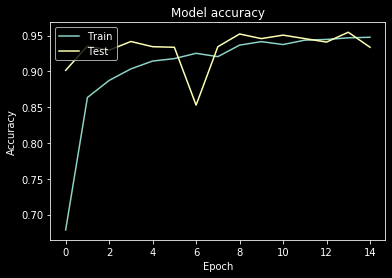

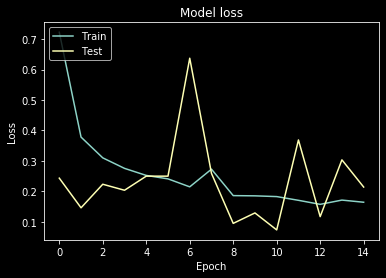

In [12]:
# SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))
plt.style.use('dark_background')
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()